In [1]:
from glob import glob 

# Using the glob function to find all files with the ".ass" extension in the "Subtitles" directory
# The result is a list of file paths, which is sorted alphabetically
subtitles_path = sorted(glob("Subtitles/*.ass"))

In [2]:
#show first 5 file paths
subtitles_path[:5]

['Subtitles/Naruto Season 1 - 01.ass',
 'Subtitles/Naruto Season 1 - 02.ass',
 'Subtitles/Naruto Season 1 - 03.ass',
 'Subtitles/Naruto Season 1 - 04.ass',
 'Subtitles/Naruto Season 1 - 05.ass']

In [3]:
# Creating empty lists to store the extracted scripts and episode numbers
scripts = []
episode_num = []

# Iterating over each path in the list of subtitle file paths
for path in subtitles_path:

    # Opening the subtitle file in read mode
    with open(path, 'r') as file:
        # Reading all lines from the file
        lines = file.readlines()
        # Removing the first 27 lines (header) from the content
        lines = lines[27:]

        # Extracting the dialogue lines and removing unnecessary columns
        rows = [",".join(line.split(',')[9:]) for line in lines]

    # Removing '\N' characters (indicates new line) and joining the lines to form the script for the episode
    rows = [line.replace("\\N", ' ') for line in rows]
    script = " ".join(rows)

    # Extracting the episode number from the file path
    episode = int(path.split('-')[1].split('.')[0].strip())

    # Appending the extracted script and episode number to their respective lists
    scripts.append(script)
    episode_num.append(episode)


In [5]:
pip install pandas 


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
# Creating a DataFrame from a dictionary with keys 'episodes' and 'script' and their corresponding values
df = pd.DataFrame.from_dict({'episodes':episode_num,'script':scripts})

In [5]:
# Displaying the first few rows of the DataFrame
df.head()

,episodes,script
0,1,"A long time ago, a powerful demon fox appeared..."
1,2,"C'mon!\n Running like a fugitive,\n Being chas..."
2,3,"C'mon!\n Running like a fugitive,\n Being chas..."
3,4,"C'mon!\n Running like a fugitive,\n Being chas..."
4,5,"C'mon!\n Running like a fugitive,\n Being chas..."


In [6]:
df.iloc[5]['script']

'C\'mon!\n Running like a fugitive,\n Being chased by something\n Inside my heart is pounding\n My throat dry like it\'s withering\n For no single one,\n To none does belong,\n This time is ours, right now...\n Unraveling the pain,\n Unraveling our hearts,\n Unraveling shadows\n Stifling our breath,\n Reaching for beyond,\n Tearing through the dark\n In fighting and in love\n To the distant light above,\n Yes, we are on the way\n I wanna rock...\n Rockin\' my heart\n Sasuke here at Point B!\n Sakura here at Point C!\n Naruto here. I\'m at Point A!\n You\'re slow, Naruto!\n Okay, the seventh squad…\n Hm?!\n The target has moved!\n Follow it!\n Alright! It\'s over there!\n What\'s your distance from the target?\n Five meters! I can go at anytime!\n I\'m ready, too!\n Me, too…!\n Okay…\n Do it!\n Uryaaah!\n I got him!\n Does he have the ribbon on his right ear…?\n Are you sure it\'s our target Tora?\n It\'s the target, no mistake.\n Alright, the mission to capture lost pet "Tora" is compl

In [7]:
pip install spacy


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import spacy
nlp = spacy.cli.download('en_core_web_trf')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.4/457.4 MB 6.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


In [54]:
pip install spacy_transformers


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip3 uninstall spacy
!pip3 install spacy-nightly[cuda100,transformers] --pre

In [7]:
import spacy
import spacy_transformers
nlp = spacy.load('en_core_web_trf')
doc = nlp("Mark went to Germany")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [8]:
print(doc)

Mark went to Germany


In [9]:
# Iterating over each entity in the spaCy doc object
for ent in doc.ents:
    # Printing the text and label of each entity
    print(ent.text, ent.label_)
    

Mark PERSON
Germany GPE


In [12]:
pip install nltk


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /Users/uail/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
import nltk
from nltk import sent_tokenize  # Importing the function for tokenizing sentences from NLTK

def get_ners(script):
    script_sentences = sent_tokenize(script)  # Tokenizing the script into sentences

    ner_output = []  # Initializing an empty list to store the named entities
    
    for sentence in script_sentences:  # Iterating through each sentence in the script
        doc = nlp(sentence)  # Processing each sentence with spaCy's NLP pipeline
        ners = set()  # Initializing an empty set to store unique named entities
        for ent in doc.ents:  # Iterating through the named entities detected in the sentence
            if ent.label_ == 'PERSON':  # Checking if the named entity is a person
                full_name = ent.text  # Getting the full name of the person
                first_name = full_name.split(' ')[0]  # Extracting the first name from the full name
                ners.add(first_name)  # Adding the first name to the set of named entities
        ner_output.append(list(ners))  # Converting the set of named entities to a list and appending it to the output list
    return ner_output  # Returning the list of named entities for each sentence in the script


In [11]:
# Applying the get_ners function to the 'script' column of the DataFrame and storing the result in a new column 'ners'
df['ners'] = df['script'].apply(get_ners)

In [12]:
# Define the window size to look back for entity relationships
window = 10

# Initialize a list to store pairs of related entities
entity_relationship = []

# Iterate over each episode's named entity results
for row in df['ners']:
    # Keep track of entities within the window for each sentence
    previous_entities_in_window = []
    
    # Iterate over each sentence's named entities
    for sentence in row:
        # Add the current sentence's entities to the window
        previous_entities_in_window.append(sentence)
        # Limit the window size to the last 10 sentences
        previous_entities_in_window = previous_entities_in_window[-10:]
        
        # Flatten the list of entities within the window
        previous_entities_flattened = sum(previous_entities_in_window, [])
        
        # Compare entities in the current sentence with those in the window
        for entity in sentence:            
            # Check each entity in the window against the current entity
            for entity_in_window in previous_entities_flattened:
                # Ensure we're comparing different entities
                if entity != entity_in_window:
                    # Sort and store the pair of entities
                    entity_rel = sorted([entity, entity_in_window])
                    # Add the entity pair to the list of relationships
                    entity_relationship.append(entity_rel)


In [13]:
# Creating a DataFrame from the list of entity relationships
relationship_df = pd.DataFrame({'value': entity_relationship})

In [14]:
# Adding a new column 'source' to relationship_df containing the first entity in each relationship
relationship_df['source'] = relationship_df['value'].apply(lambda x: x[0])

# Adding a new column 'target' to relationship_df containing the second entity in each relationship
relationship_df['target'] = relationship_df['value'].apply(lambda x: x[1])


In [15]:
# Grouping the DataFrame by 'source' and 'target' columns and counting the occurrences of each combination
relationship_df = relationship_df.groupby(['source', 'target']).count().reset_index()

In [16]:
# Sorting the DataFrame by the 'value' column in descending order
relationship_df = relationship_df.sort_values('value', ascending=False)

# Displaying the first few rows of the sorted DataFrame
relationship_df.head()


,source,target,value
2577,Naruto,Sasuke,847
2975,Sakura,Sasuke,438
2570,Naruto,Sakura,367
1363,Hinata,Naruto,324
2809,Orochimaru,Sasuke,274


In [17]:
relationship_df = relationship_df.head(200)

In [ ]:
pip install networkx

In [18]:
import networkx as nx
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

In [23]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 30.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 41.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 30.9 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp310-cp310-macosx_11_0_arm64.whl (66 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 48.2 MB/s eta 0:00:00a 0:00:01
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 30.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


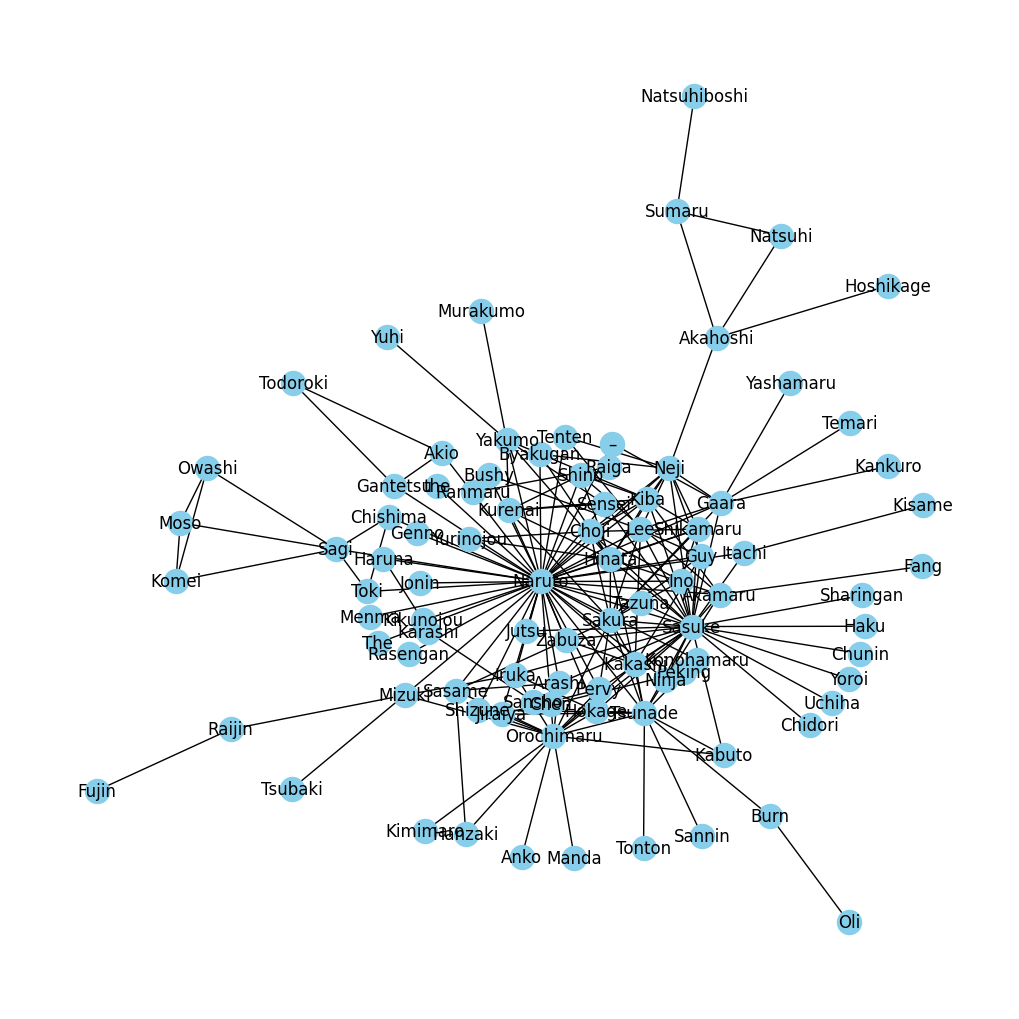

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [21]:
pip install pyvis.network

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 10.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [27]:
import pyvis.network
from pyvis.network import Network
net = Network(notebook = True, width="1300px", height="800px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("naruto.html")

naruto.html
